# **Solar Data Analysis**

Welcome to the Aditya L1 SUIT (Solar Ultraviolet Imaging Telescope) data analysis workshop. In this workshop, you will learn how to analyze SUIT data from the Aditya L1 mission using Python and some important libraries like NumPy, Sunpy, and matplotlib. We will work on Google Colab for simplicity and accessibility.

### Agenda:
1. Python Basics
2. Data Visualization with matplotlib
3. SUIT Data Analysis Exercises

## Section 1: Python Basics

We will start by refreshing some basic Python concepts. If you're new to programming or need a quick revision, this section will help.

### Key concepts:
- Variables and data types
- Loops
- Lists


In [11]:
#Variables and data types
x = 10 #assigning values to variables
y = 3.5
name = "Aditya L1"
print(f"Integer: {x}, Float: {y}, String: {name}")

Integer: 10, Float: 3.5, String: Aditya L1


In [12]:

# Lists and dictionaries
planets = ["Mercury", "Venus", "Earth", "Mars"]

print(planets)
print(planets[2:4])

['Mercury', 'Venus', 'Earth', 'Mars']
['Earth', 'Mars']


### Mathematical operations

In [13]:
a= 55.7
b= 6.3
sum= a+b
dif= a-b
mul= a*b
div= a/b
rem= a%b #remainder
pow= 2**3 #Power is given as **
print(sum)
print("The difference is", dif, "and the product is", mul)
print("We get "+str(div) + " upon division")
print("The remainder is", rem)
print("Power: ", pow)

62.0
The difference is 49.400000000000006 and the product is 350.91
We get 8.841269841269842 upon division
The remainder is 5.300000000000004
Power:  8


### Loops in python

In [14]:
# For loop
for i in range(3):
    print(i,"Welcome to HBCSE!")

0 Welcome to HBCSE!
1 Welcome to HBCSE!
2 Welcome to HBCSE!


In [15]:
# While loop
x=0
while x <10:
  print(x,'is still less than 10')
  x= x+1

print(x, 'is now 10')

0 is still less than 10
1 is still less than 10
2 is still less than 10
3 is still less than 10
4 is still less than 10
5 is still less than 10
6 is still less than 10
7 is still less than 10
8 is still less than 10
9 is still less than 10
10 is now 10


In [16]:
import numpy as np
a=67

sqrt= np.sqrt(a) #Square root can be done with numpy package
print(sqrt)

pi= np.pi #Values of constants like pi can be pulled from numpy
print(pi)

num_ls=[2,4,5,7,8,24]
print("Mean=", np.mean(num_ls))
print("Median=", np.median(num_ls))
print("Standard Deviation=", np.std(num_ls))

8.18535277187245
3.141592653589793
Mean= 8.333333333333334
Median= 6.0
Standard Deviation= 7.272474743090476


### Exercise 1: Python Basics

1. Create a list of five planets and print the third planet in the list.
2. Print the first 10 even number using `for loop` and `while loop`.

------------------------------------------------------------------------------------

# **Solar Data Analysis**
*Skip if packages are installed*

   **Pre-requisites:**

 **1. NumPy**

 **2. Matplotlib**

 **3. SunPy**



 Now, we need to install SunPy first.
 '!' runs this command in the backend terminal instead of the notebook itself, and installs SunPy.

 

In [17]:
!pip install sunpy[all]

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


### **Basics of image analysis**
Let's import required packages and list the available fits images

In [29]:
from sunpy.map import Map
import matplotlib.pyplot as plt
import astropy.units as u
from colormap import filterColor


img_dir='/home/adithya/Downloads/Sampl1_Jun16'

import glob #to list all files in the folder

print(glob.glob(img_dir+'*.fits')) #all available images in the folder

[]


Open the FITS file. Set SUIT color maps.

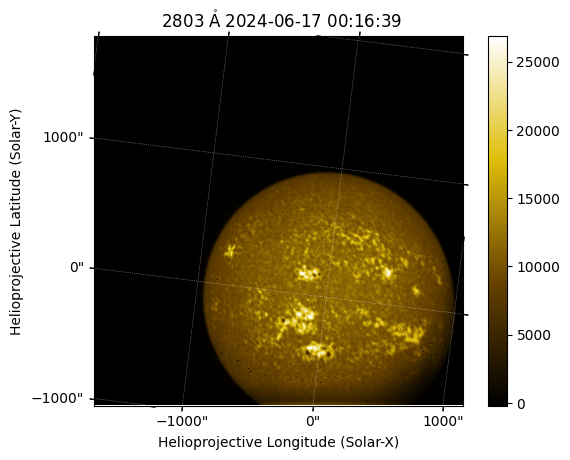

In [71]:

filename= '/home/adithya/Downloads/Sampl1_Jun16/SUT_T24_0847_000413_Lev1.0_2024-06-17T00.16.39.568_0971NB04.fits'

suit_map=Map(filename)
suit_map.peek( cmap= filterColor['NB04'],clip_interval=(1, 99.99)*u.percent )
header= suit_map.fits_header

### List the image header parameters

In [ ]:
header= suit_map.fits_header
print(header.keys) #Prints each keyword to a new line

<bound method Header.keys of SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096 / lines in image                                 
NAXIS2  =                 4096 / pixels in a line                               
EXTEND  =                    T                                                  
GRT_DT  = '2024-06-18T05:50:08.445' / GRT Time                                  
DHOBT_DT= '2024-06-17T00:16:39.56820000' / UTC time with respect to DHOBT       
FRM_CNT =                 2934 / Frame counter                                  
DHOBTCNT=         904296220482 / DHOBT Counter Clock                            
SDRAM   =           1663434752 / SDRAM Headers                                  
PACKET  =           4188285873 / Header identifier                              

### Visualize images as SunPy maps

In [70]:
import astropy.units as u
import matplotlib

suit_map.plot_settings['cmap'] =  filterColor['NB04']
fig = plt.figure()
ax = fig.add_subplot(projection=suit_map)
suit_map.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
suit_map.draw_limb(axes=ax)
suit_map.draw_grid(axes=ax)
plt.show()

NameError: name 'suit_map' is not defined

### Check specific FITS header keys

In [34]:
exp_time= header["CMD_EXPT"]
print("Exposure time in ms= ", exp_time)

cen_x= header["CRPIX1"]
cen_y= header["CRPIX2"]
print("Center of the image= ", cen_x, cen_y)

radius= header["R_SUN"]
print("Radius of the Sun= ", radius)

Map_rot= header["CROTA2"]
print("Rotation of the image= ", Map_rot)



Exposure time in ms=  2000
Center of the image=  2574.8 1201.2
Radius of the Sun=  1373.8
Rotation of the image=  7.096082885992894


### Image as a MATRIX

The image is loaded as a 2D array of numbers. This is stored as a numpy array. This array can be plotted using matplotlib.


In [ ]:
data= suit_map.data
print(data.shape)
print(data)

(4096, 4096)
[[ -39.  -69.  -65. ...  -40.  -24.  -45.]
 [ -50.  -90. -101. ...  -13.  -24.  -30.]
 [ -46.  -83.  -53. ...  -45.  -22.  -31.]
 ...
 [ -39.  -81.  -61. ...  -89. -112.  -72.]
 [ -23.  -40.  -79. ...  -54. -109.  -68.]
 [  -8.  -64.  -24. ...  -90. -119.  -48.]]


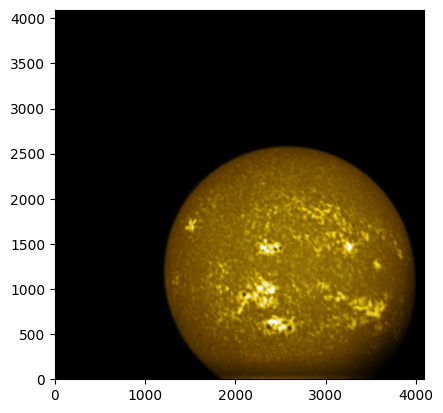

In [36]:
plt.figure()
plt.imshow(data, vmin=0, vmax= 2.5e4, cmap=filterColor['NB04'], origin='lower')
plt.show()

### Cropping image

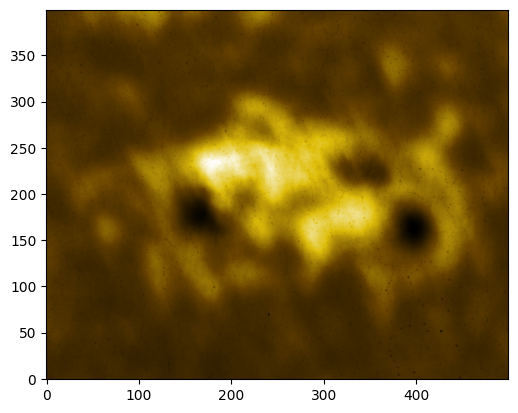

In [37]:
data_crop= data[400:800, 2200:2700] #row,col
plt.imshow(data_crop, cmap= filterColor['NB04'], origin='lower')

Finding the Min, Max, Mean, Standard Deviation of the Cropped Array

In [38]:
import numpy as np
min_val= np.min(data_crop)
max_val= np.max(data_crop)
print(min_val, max_val)

4197.0 29727.0


**Create a mask for Plage regions**

Mask all values that are below 13500. This is a binary array.

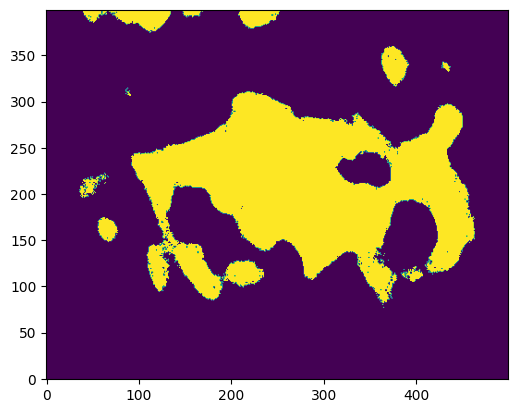

In [39]:
mask_plage= data_crop>13500
plt.imshow(mask_plage, origin='lower')

Multiply the binary array with the image array to get the pixels from plage regions.

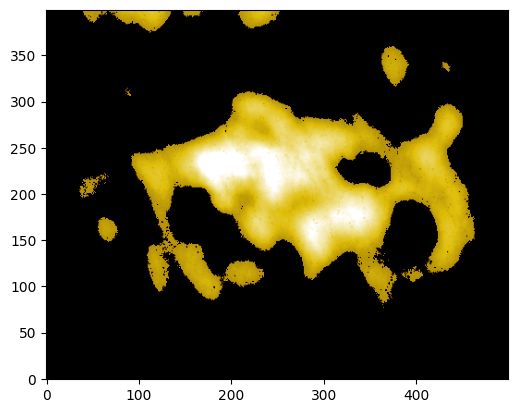

In [40]:
plage= mask_plage*data_crop
plt.imshow(plage, vmin=0, vmax=2.5e4, cmap=filterColor['NB04'], origin='lower')

**Create a mask for Quiet Sun regions**

Note that Quiet Sun regions are brighter than sun spots, but dimmer than plages. So, pixels brighter than 8000 but dimmer than 13500 should be chosen. & operator is used to combine two binary arrays.

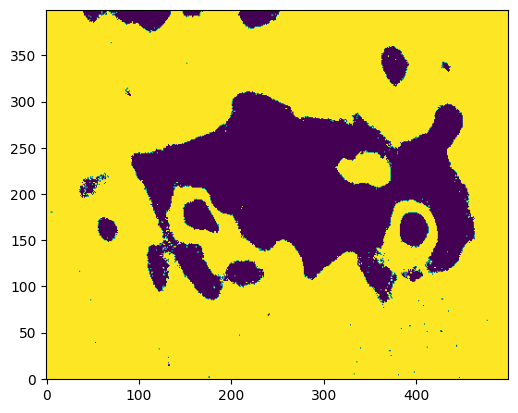

In [41]:
mask_qs=  (data_crop < 13500) & (data_crop > 8000) #Combine two different binary masks
plt.imshow(mask_qs, origin='lower')

Quiet sun mask, when multiplied with the image array gives the values for the quiet sun pixels.

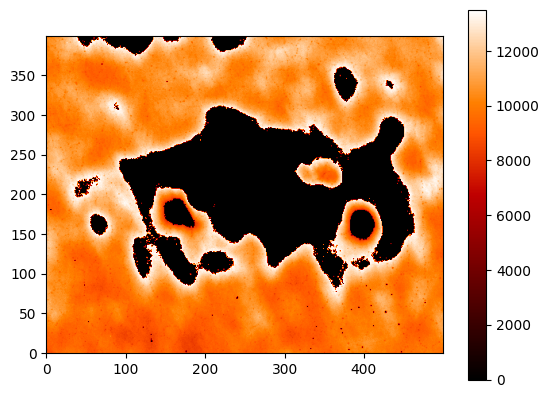

In [42]:
qs= mask_qs*data_crop #Multiply binary mask with data_crop to get quiet sun pixels
plt.imshow(qs, cmap='gist_heat', origin='lower')
plt.colorbar()

**Finding the brightness ratio of plage regions compared to quiet sun regions.**

The total intensity of plage regions and quiet sun regions is computed. The total values are divided by the number of non zero pixels in the respective masks to get the mean brightness.

NOTE: np.mean() cannot be used here, as this will divide the sum of values with the total number of pixels in the frame. Not with the number of non-zero pixels.

In [43]:
qs_mean= np.sum(qs)/ np.count_nonzero(qs) #np.count_nonzero() counts the number of non zero pixels in the array.
plage_mean= np.sum(plage)/ np.count_nonzero(plage)
print(plage_mean/qs_mean)

1.6409553297863197


### Visualizing Limb Darkening


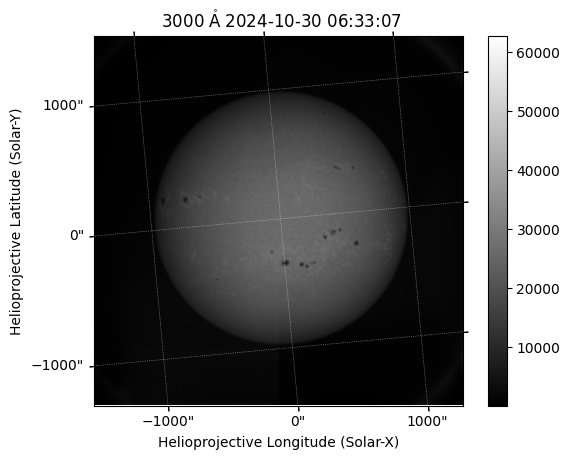

In [45]:
NB6_map=Map('/home/adithya/Downloads/Oct30/SUT_T24_1591_000631_Lev1.0_2024-10-30T06.33.07.744_0971NB06.fits')
NB6_map.peek()

Header details

In [46]:
nb6_header=NB6_map.fits_header
row_cen,col_cen=nb6_header['CRPIX1'],nb6_header['CRPIX2']
print(row_cen,col_cen)

2069.6 2069.9


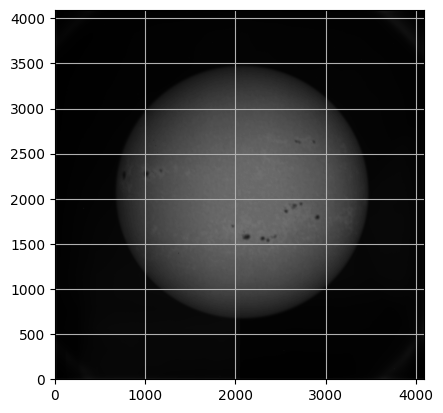

In [48]:
NB6_data= NB6_map.data
plt.figure()
plt.imshow(NB6_data, vmin=0, cmap='gray', origin='lower')
plt.grid()
plt.show()

Intensity profile along the row 2069

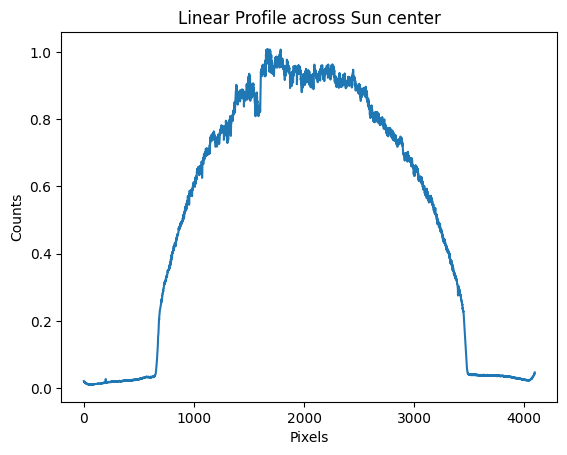

In [ ]:
plt.plot(NB6_data[2069]/np.max(NB6_data[2069]))

plt.title("Linear Profile across Sun center")
plt.ylabel("Counts")
plt.xlabel("Pixels")
plt.show()

Intensity profile along the col 2069

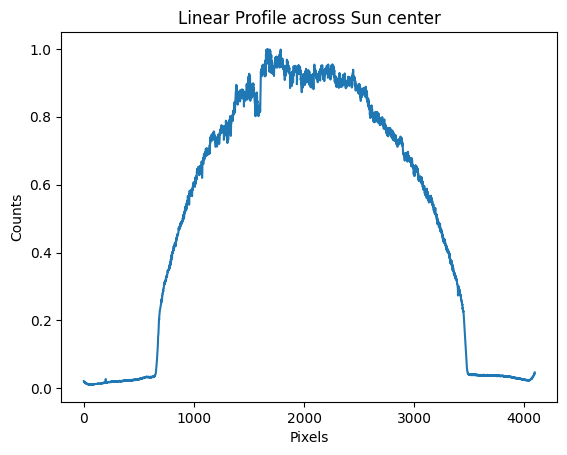

In [53]:
plt.plot(NB6_data[:,2069]/np.max(NB6_data[:,2069]))

plt.title("Linear Profile across Sun center")
plt.ylabel("Counts")
plt.xlabel("Pixels")
plt.show()

### Working HMI data
Downloading HMI image using fido package

In [64]:
from sunpy.net import Fido, attrs as a
import astropy.units as u

# Define time range
time_range = a.Time("2024-06-17 00:16", "2024-06-17 00:17")  # Modify as needed
hmi_query = Fido.search(time_range, a.Instrument("HMI"), a.Physobs("LOS_magnetic_field"))

# Download the data
hmi_files = Fido.fetch(hmi_query,path='.')


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi.m_45s.2024.06.17_00_17_15_TAI.magnetogram.fits:   0%|          | 0.00/16.1M [00:00<?, ?B/s]

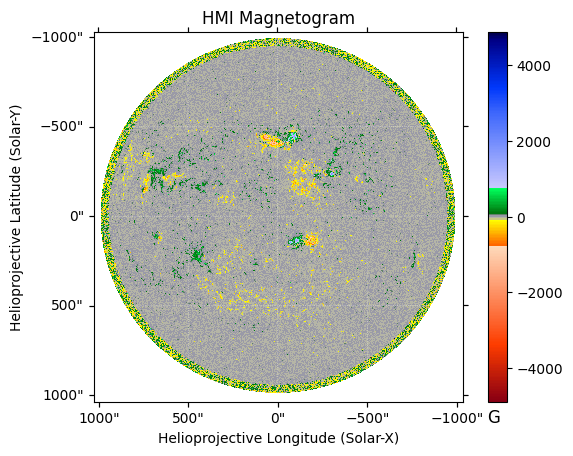

In [100]:
hmi_map = Map('/home/adithya/Downloads/hmi.m_45s.2024.06.17_00_17_15_TAI.magnetogram.fits')
hmi_map.peek(cmap='hmimag',title='HMI Magnetogram')

Rotate the HMI map

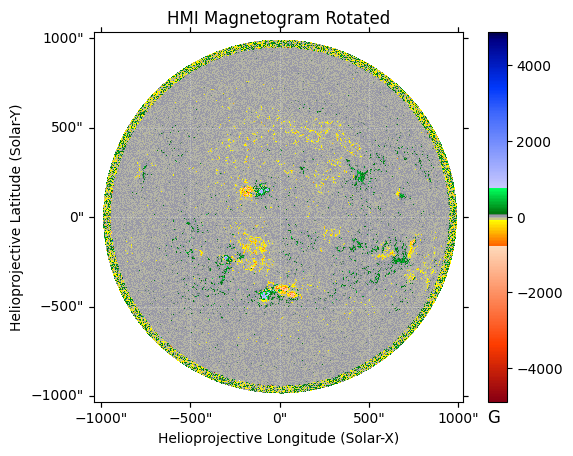

In [113]:
hmi_rotated = hmi_map.rotate(order=3)
hmi_rotated.peek(cmap='hmimag',title='HMI Magnetogram Rotated')


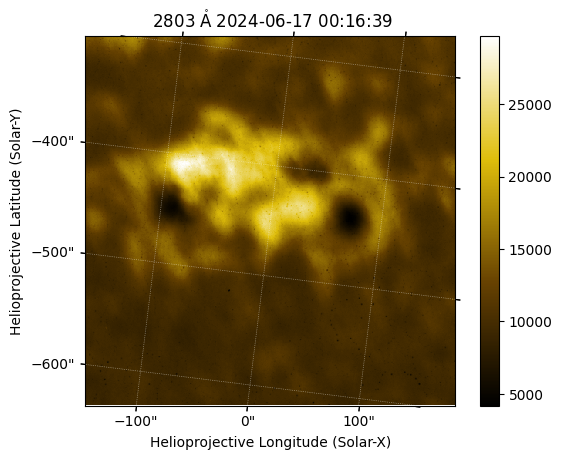

In [101]:
from astropy.coordinates import SkyCoord

tx1, tx2 = -150, 150
ty1, ty2 = -600,-300

coords = SkyCoord(Tx=(tx1, tx2) * u.arcsec, Ty=(ty1,ty2) * u.arcsec, frame=suit_map.coordinate_frame)
suit_box=suit_map.submap(coords)
suit_box.peek(cmap=filterColor['NB04'])

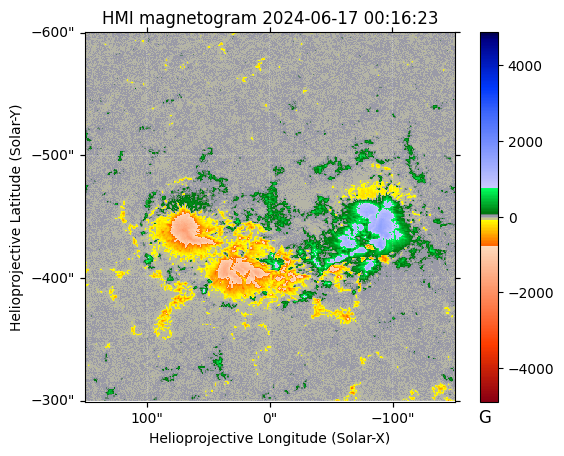

In [114]:
hmicoords = SkyCoord(Tx=(tx1, tx2) * u.arcsec, Ty=(ty1,ty2) * u.arcsec, frame=hmi_map.coordinate_frame)
hmi_box=hmi_map.submap(hmicoords)
hmi_box.peek(cmap='hmimag')